In [ ]:
!pip install neattext

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import neattext.functions as nfx
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
df = pd.read_csv('emotion_dataset_raw.csv')
df.dropna(inplace=True)
df['Clean_Text'] = df['Text'].apply(nfx.remove_userhandles)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_punctuations)

<ipython-input-37-1e890e1473c7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')


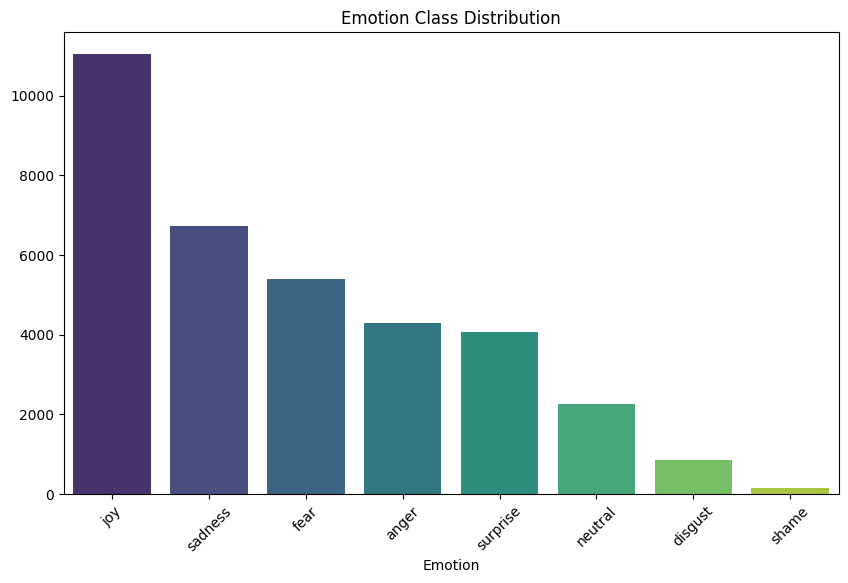

In [ ]:
emotion_counts = df['Emotion'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values, palette='viridis')
plt.title("Emotion Class Distribution")
plt.xticks(rotation=45)
plt.show()

In [ ]:
X = df['Clean_Text']
y = df['Emotion']

vectorizer = TfidfVectorizer()
X_vect = vectorizer.fit_transform(X)

In [ ]:
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X_vect, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=3000, solver='liblinear')
model.fit(X_train, y_train)


LogisticRegression(max_iter=3000, solver='liblinear')

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7842349479402445

Classification Report:
               precision    recall  f1-score   support

       anger       0.76      0.66      0.70      2203
     disgust       0.89      0.99      0.93      2191
        fear       0.86      0.78      0.82      2317
         joy       0.67      0.61      0.64      2186
     neutral       0.65      0.91      0.75      2166
     sadness       0.70      0.56      0.62      2185
       shame       1.00      1.00      1.00      2201
    surprise       0.77      0.77      0.77      2223

    accuracy                           0.78     17672
   macro avg       0.79      0.78      0.78     17672
weighted avg       0.79      0.78      0.78     17672



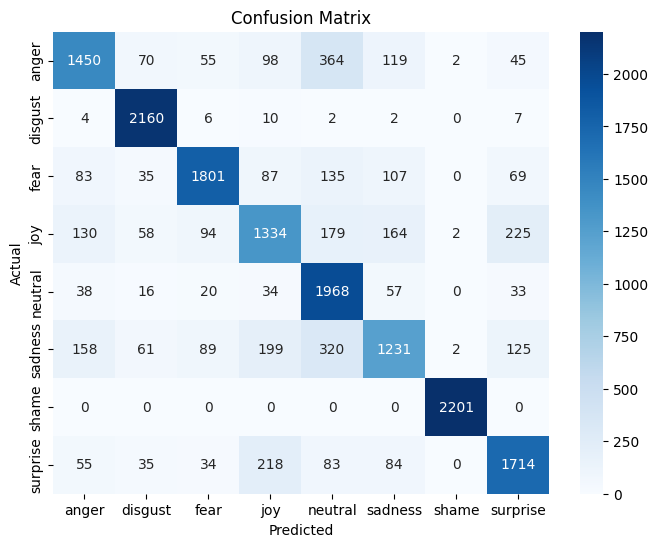

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
joblib.dump(model,'rf_emotion_model.pkl')
joblib.dump(vectorizer,'rf_vectorizer.pkl')

['rf_vectorizer.pkl']

In [ ]:
def predict_emotion(text):
    text=nfx.remove_userhandles(text)
    text=nfx.remove_stopwords(text)
    text=nfx.remove_punctuations(text)
    vect_text=vectorizer.transform([text])
    return model.predict(vect_text)[0]

#examples
print(predict_emotion("Nobody doubted him , or failed to recognise his temporary financial embarrassment .")) #shame
print(predict_emotion("pop out &amp; roll across the floor !")) #surprise
print(predict_emotion("Why ?")) #neutral

shame
surprise
neutral


In [ ]:
model=joblib.load('rf_emotion_model.pkl')
vectorizer = joblib.load('rf_vectorizer.pkl')

In [ ]:
def predict_emotion(text):
    text_vector=vectorizer.transform([text])
    prediction=model.predict(text_vector)
    return prediction[0]

In [ ]:
new_text="Its a very sunny day"
emotion=predict_emotion(new_text)
print("Predicted Emotion:",emotion)

Predicted Emotion: joy
